In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mybigdatabowl2021/plays_with_both.csv


In [2]:
import re
import math
import pandas as pd
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm import tqdm

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

In [3]:
plays = pd.read_csv("/kaggle/input/mybigdatabowl2021/plays_with_both.csv").drop(['Unnamed: 0'], axis=1)

In [4]:
nan = np.nan
playsWithPair = plays.query("target!='-'")
playsWithPair = playsWithPair[~playsWithPair.coverOne.isna()]
playsWithPair = playsWithPair.reset_index(drop=True)
print(str(round(100.0*len(playsWithPair)/len(plays), 1))+"%")
nan = np.nan
playsWithPair = plays.query("target!='-'")
playsWithPair = playsWithPair[~playsWithPair.coverOne.isna()]
playsWithPair = playsWithPair.reset_index(drop=True)
print(str(round(100.0*len(playsWithPair)/len(plays), 1))+"%")


80.1%
80.1%


In [5]:
playsWithPair.head(1)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,target,coverOne,coverTwo
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,Julio Jones,Malcolm Jenkins,NaN


In [6]:
coverTwoExists = playsWithPair[~playsWithPair.coverTwo.isna()]
target = pd.concat([playsWithPair.target, coverTwoExists.target])
cover = pd.concat([playsWithPair.coverOne, coverTwoExists.coverTwo])
passResult = pd.concat([playsWithPair.passResult, coverTwoExists.passResult])
pairResult = pd.DataFrame()
pairResult = pairResult.assign(target=target, cover=cover, passResult=passResult)
pairResult = pairResult.reset_index(drop=True)
pairResult

,target,cover,passResult
0,Julio Jones,Malcolm Jenkins,C
1,Calvin Ridley,Jalen Mills,I
2,Devonta Freeman,Jalen Mills,I
3,Julio Jones,Ronald Darby,C
4,Devonta Freeman,Ronald Darby,I
...,...,...,...
16797,Jerome Cunningham,Ben Gedeon,C
16798,Jared Cook,Josey Jewell,C
16799,Devontae Booker,Erik Harris,C
16800,Courtland Sutton,Erik Harris,I


In [7]:
pairResult.query("passResult=='C'").groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)

passResult
target              cover                         
Davante Adams       Xavier Rhodes               12
Julio Jones         Eli Apple                    9
Christian McCaffrey De'Vondre Campbell           7
Adam Humphries      Captain Munnerlyn            7
Stefon Diggs        Prince Amukamara             7
...                                            ...
Geronimo Allison    Adrian Amos                  1
Gerald Everett      Tramaine Brock               1
                    Sherrick McManis             1
                    Quandre Diggs                1
Jonnu Smith         Denzel Perryman              1

[8684 rows x 1 columns]

In [8]:
pairCompletion= pairResult.query("passResult=='C'").groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)
pairTotal = pairResult.groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)
pairTotal = pairTotal.assign(completionRate=pairCompletion.passResult.divide(pairTotal.passResult, fill_value=0.0))
pairTotal.query("passResult > 3").sort_values(['passResult','completionRate'], ascending=[False, True])


,,passResult,completionRate
target,cover,,
Davante Adams,Xavier Rhodes,14,0.857143
Odell Beckham,James Bradberry,10,0.500000
Julio Jones,Eli Apple,10,0.900000
Antonio Brown,Denzel Ward,9,0.555556
T.Y. Hilton,Jalen Ramsey,8,0.625000
Mike Evans,James Bradberry,8,0.625000
DeAndre Hopkins,Jalen Ramsey,8,0.625000
Michael Thomas,Lavonte David,8,0.875000
Adam Humphries,Captain Munnerlyn,8,0.875000


In [9]:
pairIncompletion = pairResult.query("passResult!='C'").groupby('cover').count().sort_values("passResult", ascending=False)
pairTotal = pairResult.groupby('cover').count().sort_values("passResult", ascending=False)
pairTotal = pairTotal.assign(incompletionRate=pairIncompletion.passResult.divide(pairTotal.passResult, fill_value=0.0)).drop('target', axis=1)
pairTotal = pairTotal.rename(columns={'passResult':'coverCount'})[["incompletionRate", "coverCount"]]
pairTotal = pairTotal.sort_values(['coverCount', 'incompletionRate'], ascending=[False, True])
pairTotal.head(150)

,incompletionRate,coverCount
cover,,
James Bradberry,0.419048,105
Eli Apple,0.352941,102
Adoree' Jackson,0.326733,101
Tremaine Edmunds,0.340206,97
Darius Leonard,0.252632,95
Jamal Adams,0.389474,95
Tyrann Mathieu,0.250000,92
Prince Amukamara,0.336957,92
Shawn Williams,0.307692,91


In [10]:
ax = pairTotal.plot.scatter(x='coverCount', y='incompletionRate', figsize=(10,5))
plt.plot([-10,130], [pairTotal.incompletionRate.mean(), pairTotal.incompletionRate.mean()], c='C1')

In [11]:
print("Average Incompletion Rate:\t" + str(round(pairTotal.incompletionRate.mean(),3)))
print("Average Cover Count:\t" + str(round(pairTotal.coverCount.mean(), 1)))

Average Incompletion Rate:	0.304
Average Cover Count:	31.3


Index(['James Bradberry', 'Darius Slay', 'Stephon Gilmore', 'Terrell Suggs',
       'Marlon Humphrey', 'Za'Darius Smith', 'Jamal Adams'],
      dtype='object', name='cover')


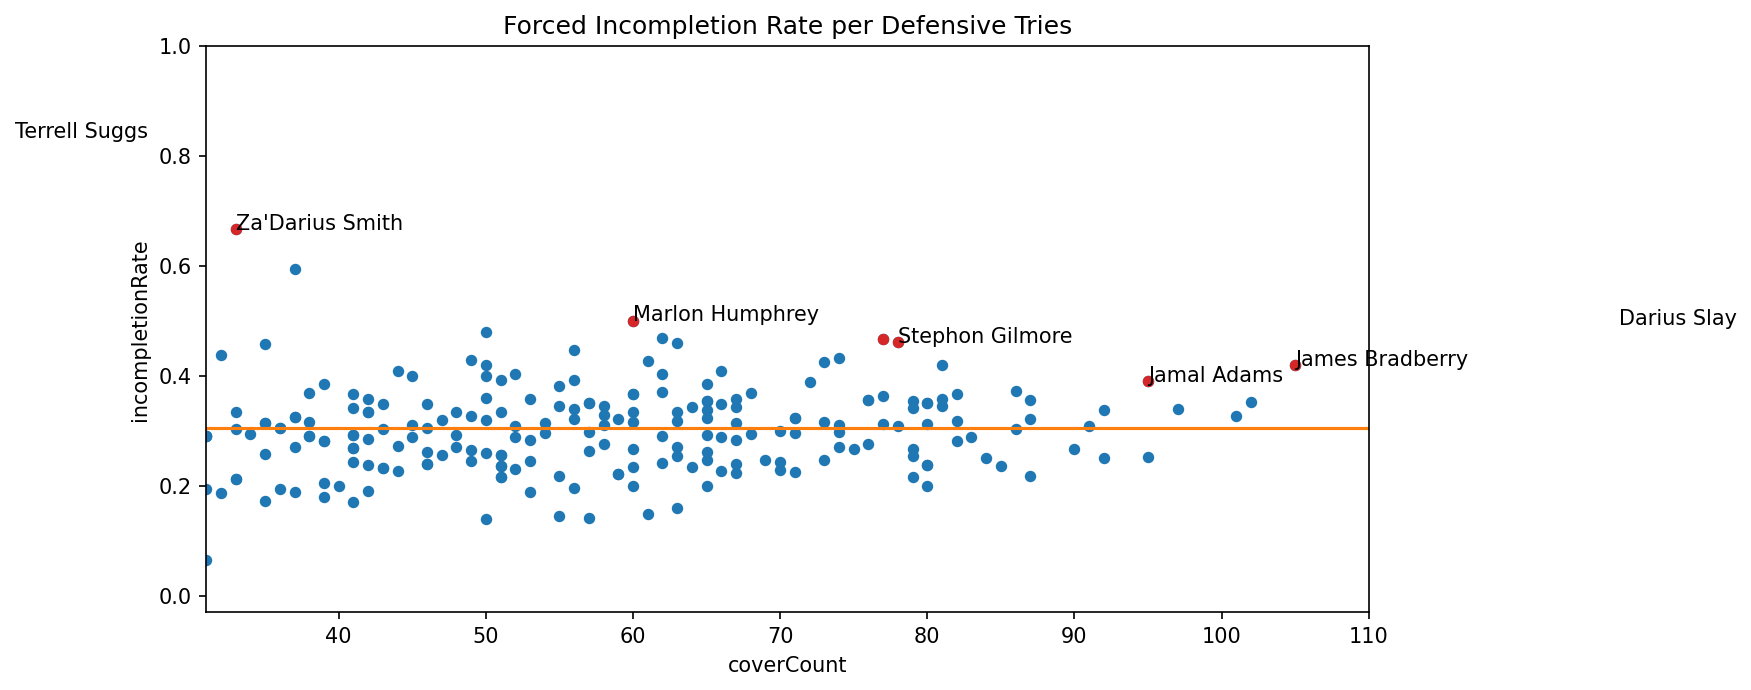

In [12]:
plt.close('all')
ax = pairTotal.plot.scatter(x='coverCount', y='incompletionRate', figsize=(10,5))
plt.plot([-10,130], [pairTotal.incompletionRate.mean(), pairTotal.incompletionRate.mean()], c='C1')

# Finding the players on the edges
tempX = np.arange(0,110,1)
tempY = np.exp(-0.025 * (tempX+10))+0.6
#plt.plot(tempX, tempY, c='C2')

tempDistToLine = []
for i in range(len(pairTotal)):
    p = pairTotal.iloc[i]
    minDist = 100000000
    for j in range(len(tempX)):
        tempdist = math.sqrt((p.coverCount-j)**2+(p.incompletionRate-tempY[j])**2)
        minDist = min(minDist, tempdist)
    tempDistToLine.append(minDist)
temp = pairTotal.assign(dist=tempDistToLine)
edge_points = temp.sort_values('dist', ascending=True)[:7]
edge_points.plot.scatter(x='coverCount', y='incompletionRate',c='C3', ax=ax)
for i in range(len(edge_points)):
    p = edge_points.iloc[i]
    name = edge_points.index[i]
    if 'Darius Slay' in name:
        plt.text(x=p.coverCount+50, y=p.incompletionRate+0.025, s=name)
    else:   
        plt.text(x=p.coverCount, y=p.incompletionRate, s=name)
print(edge_points.index)


plt.xlim([31, 110])
plt.ylim([-.03, 1])
plt.title("Forced Incompletion Rate per Defensive Tries")
plt.show()

In [13]:
edge_points.drop('dist', axis=1).sort_values('coverCount', ascending=False)

,incompletionRate,coverCount
cover,,
James Bradberry,0.419048,105
Jamal Adams,0.389474,95
Stephon Gilmore,0.461538,78
Darius Slay,0.467532,77
Marlon Humphrey,0.500000,60
Za'Darius Smith,0.666667,33
Terrell Suggs,0.833333,18


In [14]:
edge_points.drop('dist', axis=1).sort_values('coverCount', ascending=False)

,incompletionRate,coverCount
cover,,
James Bradberry,0.419048,105
Jamal Adams,0.389474,95
Stephon Gilmore,0.461538,78
Darius Slay,0.467532,77
Marlon Humphrey,0.500000,60
Za'Darius Smith,0.666667,33
Terrell Suggs,0.833333,18


In [15]:
pairIncompletion = pairResult.query("passResult!='C'").groupby('cover').count().sort_values("passResult", ascending=False)
pairTotal = pairResult.groupby('cover').count().sort_values("passResult", ascending=False)


In [16]:
coverTwoExists = playsWithPair[~playsWithPair.coverTwo.isna()]
target = pd.concat([playsWithPair.target, coverTwoExists.target])
cover = pd.concat([playsWithPair.coverOne, coverTwoExists.coverTwo])
passResult = pd.concat([playsWithPair.passResult, coverTwoExists.passResult])
pairResult = pd.DataFrame()
pairResult = pairResult.assign(target=target, cover=cover, passResult=passResult)
pairResult = pairResult.reset_index(drop=True)
pairResult

,target,cover,passResult
0,Julio Jones,Malcolm Jenkins,C
1,Calvin Ridley,Jalen Mills,I
2,Devonta Freeman,Jalen Mills,I
3,Julio Jones,Ronald Darby,C
4,Devonta Freeman,Ronald Darby,I
...,...,...,...
16797,Jerome Cunningham,Ben Gedeon,C
16798,Jared Cook,Josey Jewell,C
16799,Devontae Booker,Erik Harris,C
16800,Courtland Sutton,Erik Harris,I


In [17]:
df = pd.DataFrame(pairResult)
print(df)

                  target            cover passResult
0            Julio Jones  Malcolm Jenkins          C
1          Calvin Ridley      Jalen Mills          I
2        Devonta Freeman      Jalen Mills          I
3            Julio Jones     Ronald Darby          C
4        Devonta Freeman     Ronald Darby          I
...                  ...              ...        ...
16797  Jerome Cunningham       Ben Gedeon          C
16798         Jared Cook     Josey Jewell          C
16799    Devontae Booker      Erik Harris          C
16800   Courtland Sutton      Erik Harris          I
16801      Robert Foster      Erik Harris          I

[16802 rows x 3 columns]


In [18]:
top_ten = ["Antonio Brown","DeAndre Hopkins","Julio Jones","Odell Beckham Jr.","Keenan Allen","A.J. Green","Michael Thomas","Josh Gordon","Mike Evans","Stefon Diggs"]
df.loc[df['target'].isin(top_ten)]
newdf = df.loc[df['target'].isin(top_ten)]
newdf

,target,cover,passResult
0,Julio Jones,Malcolm Jenkins,C
3,Julio Jones,Ronald Darby,C
12,Julio Jones,Ronald Darby,I
20,Julio Jones,Ronald Darby,C
28,Julio Jones,Jalen Mills,C
...,...,...,...
16660,Julio Jones,Jermaine Carter,C
16665,Julio Jones,Donte Jackson,I
16708,Michael Thomas,Colin Jones,C
16734,Julio Jones,Lavonte David,C


In [19]:
newdf.query("passResult=='C'").groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)

,,passResult
target,cover,
Julio Jones,Eli Apple,9
Stefon Diggs,Prince Amukamara,7
Julio Jones,Jaire Alexander,7
Michael Thomas,Lavonte David,7
Mike Evans,Ronald Darby,6
DeAndre Hopkins,Stephon Gilmore,6
Michael Thomas,James Bradberry,6
DeAndre Hopkins,Jalen Ramsey,5
Julio Jones,Jessie Bates,5


In [20]:
pairCompletion= newdf.query("passResult=='C'").groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)
pairTotal = newdf.groupby(['target', 'cover']).count().sort_values("passResult", ascending=False)
pairTotal = pairTotal.assign(completionRate=pairCompletion.passResult.divide(pairTotal.passResult, fill_value=0.0))
pairTotal.query("passResult > 6").sort_values(['passResult','completionRate'], ascending=[False, True])






,,passResult,completionRate
target,cover,,
Julio Jones,Eli Apple,10,0.900000
Antonio Brown,Denzel Ward,9,0.555556
Mike Evans,James Bradberry,8,0.625000
DeAndre Hopkins,Jalen Ramsey,8,0.625000
Stefon Diggs,Prince Amukamara,8,0.875000
Michael Thomas,Lavonte David,8,0.875000
Julio Jones,Jaire Alexander,8,0.875000
Antonio Brown,Jalen Ramsey,7,0.428571
A.J. Green,Orlando Scandrick,7,0.571429


In [21]:
pairIncompletion = newdf.query("passResult!='C'").groupby('cover').count().sort_values("passResult", ascending=False)
pairTotal = newdf.groupby('cover').count().sort_values("passResult", ascending=False)
pairTotal = pairTotal.assign(incompletionRate=pairIncompletion.passResult.divide(pairTotal.passResult, fill_value=0.0)).drop('target', axis=1)
pairTotal = pairTotal.rename(columns={'passResult':'coverCount'})[["incompletionRate", "coverCount"]]
pairTotal = pairTotal.sort_values(['coverCount', 'incompletionRate'], ascending=[False, True])
pairTotal.head(26)


,incompletionRate,coverCount
cover,,
James Bradberry,0.291667,24
Joe Haden,0.352941,17
Byron Jones,0.529412,17
Lavonte David,0.312500,16
Damarious Randall,0.375000,16
Eli Apple,0.200000,15
Ronald Darby,0.200000,15
Sean Davis,0.333333,15
Denzel Ward,0.333333,15


In [22]:
ax = pairTotal.plot.scatter(x='coverCount', y='incompletionRate', figsize=(10,5))
plt.plot([-10,130], [pairTotal.incompletionRate.mean(), pairTotal.incompletionRate.mean()], c='C1')

In [23]:
print("Average Incompletion Rate:\t" + str(round(pairTotal.incompletionRate.mean(),3)))
print("Average Cover Count:\t" + str(round(pairTotal.coverCount.mean(), 1)))

Average Incompletion Rate:	0.326
Average Cover Count:	3.8


Index(['Darius Phillips', 'Terrell Suggs', 'Antone Exum', 'Sam Shields',
       'Rashaan Gaulden', 'Lorenzo Alexander', 'Reggie Gilbert'],
      dtype='object', name='cover')


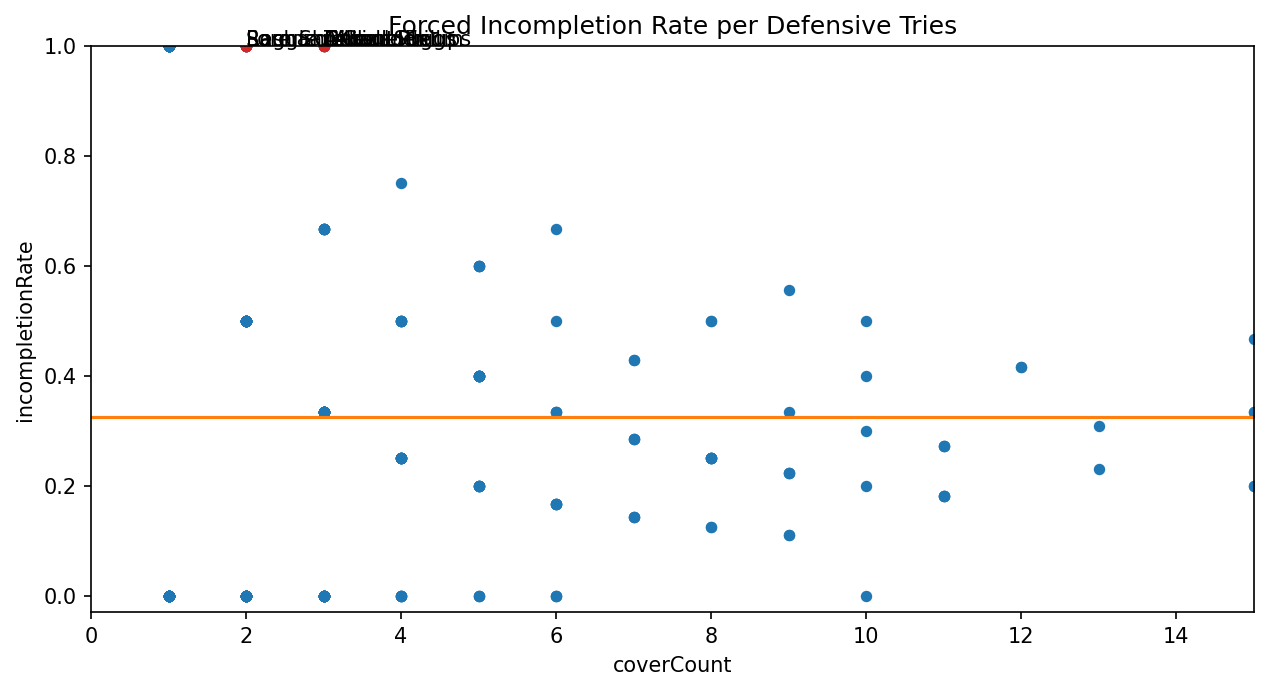

In [24]:
plt.close('all')
ax = pairTotal.plot.scatter(x='coverCount', y='incompletionRate', figsize=(10,5))
plt.plot([-10,15], [pairTotal.incompletionRate.mean(), pairTotal.incompletionRate.mean()], c='C1')

# Finding the players on the edges
tempX = np.arange(0,15,1)
tempY = np.exp(-0.025 * (tempX+10))+0.6
#plt.plot(tempX, tempY, c='C2')

tempDistToLine = []
for i in range(len(pairTotal)):
    p = pairTotal.iloc[i]
    minDist = 100000000
    for j in range(len(tempX)):
        tempdist = math.sqrt((p.coverCount-j)**2+(p.incompletionRate-tempY[j])**2)
        minDist = min(minDist, tempdist)
    tempDistToLine.append(minDist)
temp = pairTotal.assign(dist=tempDistToLine)
edge_points = temp.sort_values('dist', ascending=True)[:7]
edge_points.plot.scatter(x='coverCount', y='incompletionRate',c='C3', ax=ax)
for i in range(len(edge_points)):
    p = edge_points.iloc[i]
    name = edge_points.index[i]
    if 'Darius Slay' in name:
        plt.text(x=p.coverCount+50, y=p.incompletionRate+0.025, s=name)
    else:   
        plt.text(x=p.coverCount, y=p.incompletionRate, s=name)
print(edge_points.index)


plt.xlim(0, 15)
plt.ylim([-.03, 1])
plt.title("Forced Incompletion Rate per Defensive Tries")
plt.show()